1) The information of those who lost their lives and those who survived in the Titanic disaster are collected in two data tables. Using these data tables, create an artificial neural network model for binary classification as follows. Make some predictions by training and testing this model.

Explanation

The data tables in the study are located in the "data" folder in the format "titanic-trainingdataset.csv" and "titanic-testdataset.csv. In these data tables, the following columns should be omitted:

- Passenger
- Name
- Ticket
- Cabin

In [1]:
import pandas as pd
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
titanic_train = pd.read_csv('data/titanic-trainingdataset.csv')
titanic_train = titanic_train.drop(['PassengerId',
                                      'Name',
                                      'Ticket',
                                      'Cabin'],1)

titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


The following columns should be "one-hot-encoding" applied:

- PClass (Which class of ticket the passenger gets)
- Embarked (Which destination the passenger wants to go to)

If the column contains categorical information with two options (as in the Sex column), this column does not need to be "one-hot-encoded". This column can only be converted to numerical values ​​with the format 0 and 1.

The "Survived" column in the data tables consists of the actual values ​​to be estimated. This column indicates which passengers, according to available information, survived the Titanic disaster. So you need to parse this column. (So ​​this column will be changed to "training_dataset_y" and "test_dataset_y" format.)

In [3]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [4]:
# Fill Age columns NaN values with the mean
titanic_train["Age"].fillna((titanic_train["Age"].mean()), inplace=True)
# Drop Embarked columns NaN values
titanic_train = titanic_train.dropna(subset=["Embarked"])
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [5]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [6]:
# creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot to pclass column
pclass = pd.DataFrame(one_hot_encoder.fit_transform(titanic_train[['Pclass']]).toarray())

titanic_train_new = titanic_train.join(pclass)

df2 = pd.get_dummies(titanic_train_new[["Pclass"]])
titanic_train_new = pd.concat([titanic_train_new,df2],axis=1)
titanic_train_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,Pclass
0,0,3,male,22.000000,1,0,7.2500,S,0.0,0.0,1.0,3
1,1,1,female,38.000000,1,0,71.2833,C,1.0,0.0,0.0,1
2,1,3,female,26.000000,0,0,7.9250,S,0.0,0.0,1.0,3
3,1,1,female,35.000000,1,0,53.1000,S,1.0,0.0,0.0,1
4,0,3,male,35.000000,0,0,8.0500,S,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0.0,0.0,1.0,2
887,1,1,female,19.000000,0,0,30.0000,S,1.0,0.0,0.0,1
888,0,3,female,29.699118,1,2,23.4500,S,0.0,0.0,1.0,3
889,1,1,male,26.000000,0,0,30.0000,C,NaN,NaN,NaN,1


In [7]:
# One-hot to pclass column
embarked = pd.DataFrame(one_hot_encoder.fit_transform(titanic_train[['Embarked']]).toarray())

titanic_train_new = titanic_train.join(embarked)

df2 = pd.get_dummies(titanic_train_new[["Embarked"]])
titanic_train_new = pd.concat([titanic_train_new,df2],axis=1)
titanic_train_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.000000,1,0,7.2500,S,0.0,0.0,1.0,0,0,1
1,1,1,female,38.000000,1,0,71.2833,C,1.0,0.0,0.0,1,0,0
2,1,3,female,26.000000,0,0,7.9250,S,0.0,0.0,1.0,0,0,1
3,1,1,female,35.000000,1,0,53.1000,S,0.0,0.0,1.0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,0.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0.0,0.0,1.0,0,0,1
887,1,1,female,19.000000,0,0,30.0000,S,1.0,0.0,0.0,0,0,1
888,0,3,female,29.699118,1,2,23.4500,S,0.0,1.0,0.0,0,0,1
889,1,1,male,26.000000,0,0,30.0000,C,NaN,NaN,NaN,1,0,0


In [8]:
titanic_train_new.pop('Embarked')
titanic_train_new.pop('Pclass')
titanic_train_new

,Survived,Sex,Age,SibSp,Parch,Fare,0,1,2,Embarked_C,Embarked_Q,Embarked_S
0,0,male,22.000000,1,0,7.2500,0.0,0.0,1.0,0,0,1
1,1,female,38.000000,1,0,71.2833,1.0,0.0,0.0,1,0,0
2,1,female,26.000000,0,0,7.9250,0.0,0.0,1.0,0,0,1
3,1,female,35.000000,1,0,53.1000,0.0,0.0,1.0,0,0,1
4,0,male,35.000000,0,0,8.0500,0.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,0.0,0.0,1.0,0,0,1
887,1,female,19.000000,0,0,30.0000,1.0,0.0,0.0,0,0,1
888,0,female,29.699118,1,2,23.4500,0.0,1.0,0.0,0,0,1
889,1,male,26.000000,0,0,30.0000,NaN,NaN,NaN,1,0,0


In [9]:
# label encoder to pclass column
le = LabelEncoder()
titanic_train_new['Sex'] = le.fit_transform(titanic_train_new['Sex'])
titanic_train_new

,Survived,Sex,Age,SibSp,Parch,Fare,0,1,2,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.000000,1,0,7.2500,0.0,0.0,1.0,0,0,1
1,1,0,38.000000,1,0,71.2833,1.0,0.0,0.0,1,0,0
2,1,0,26.000000,0,0,7.9250,0.0,0.0,1.0,0,0,1
3,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0,0,0,1
4,0,1,35.000000,0,0,8.0500,0.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0.0,0.0,1.0,0,0,1
887,1,0,19.000000,0,0,30.0000,1.0,0.0,0.0,0,0,1
888,0,0,29.699118,1,2,23.4500,0.0,1.0,0.0,0,0,1
889,1,1,26.000000,0,0,30.0000,NaN,NaN,NaN,1,0,0


In [10]:
y_train = to_categorical(titanic_train_new["Survived"]).reshape((-1,1))

standardisation = StandardScaler()  
# Scaled feature 
titanic_train_new = standardisation.fit_transform(titanic_train_new) 
  
print ("\nAfter Standardisation : \n", titanic_train_new) 

X_train = titanic_train_new[:,1:]
X_train, y_train


After Standardisation : 
 [[-0.78696114  0.73534203 -0.59049493 ... -0.48271079 -0.30794088
   0.61679395]
 [ 1.27071078 -1.35991138  0.64397101 ...  2.07163382 -0.30794088
  -1.62128697]
 [ 1.27071078 -1.35991138 -0.28187844 ... -0.48271079 -0.30794088
   0.61679395]
 ...
 [-0.78696114 -1.35991138  0.00352373 ... -0.48271079 -0.30794088
   0.61679395]
 [ 1.27071078  0.73534203 -0.28187844 ...  2.07163382 -0.30794088
  -1.62128697]
 [-0.78696114  0.73534203  0.18104628 ... -0.48271079  3.24737656
  -1.62128697]]


(array([[ 0.73534203, -0.59049493,  0.43135024, ..., -0.48271079,
         -0.30794088,  0.61679395],
        [-1.35991138,  0.64397101,  0.43135024, ...,  2.07163382,
         -0.30794088, -1.62128697],
        [-1.35991138, -0.28187844, -0.47519908, ..., -0.48271079,
         -0.30794088,  0.61679395],
        ...,
        [-1.35991138,  0.00352373,  0.43135024, ..., -0.48271079,
         -0.30794088,  0.61679395],
        [ 0.73534203, -0.28187844, -0.47519908, ...,  2.07163382,
         -0.30794088, -1.62128697],
        [ 0.73534203,  0.18104628, -0.47519908, ..., -0.48271079,
          3.24737656, -1.62128697]]),
 array([[1.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [0.]], dtype=float32))

You can follow the steps below in order to solve this problem:

1) The files "titanic-trainingdataset.csv" and "titanic-testdataset.csv" are read with the numpy.loadtxt function. The numpy array (ie ndarray object) to be obtained as a result of this reading will consist of heterogeneous columns. Therefore, the dtype property of the resulting array will be 'object'. Before you can use this data, you need to somehow bring this dtype property to numerical form (typically 'float32').

2) After reading the files, the columns mentioned above should be removed from the numpy array.

3) The "Survived" columns in the read files should be extracted from the numpy array and changed to the format training_dataset_y and test_dataset_y. Note that these columns must consist of 0's and 1's.

4) After that, "one-hot_encoding" should be done on the columns. For example, in the "PClass" column, there are 3 different categorical values, 1, 2, 3. As a result of one hot encoding process, this column should be removed completely and replaced with 3 columns. The "Embarked" column indicates where the passenger bought a ticket to get off. This column is also a categorical column consisting of 3 values. Therefore, it will be put into "one hot encoding" process in a similar way.

In [11]:
titanic_test = pd.read_csv('data/titanic-testdataset.csv')
titanic_test = titanic_test.drop(['PassengerId',
                                      'Name',
                                      'Ticket',
                                      'Cabin'],1)

titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [12]:
# Fill Age columns NaN values with the mean
titanic_test["Age"].fillna((titanic_test["Age"].mean()), inplace=True)
# Drop Embarked columns NaN values
titanic_test = titanic_test.dropna(subset=["Embarked"])


# creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot to pclass column
pclass = pd.DataFrame(one_hot_encoder.fit_transform(titanic_test[['Pclass']]).toarray())

titanic_test_new = titanic_test.join(pclass)

df2 = pd.get_dummies(titanic_test_new[["Pclass"]])
titanic_test_new = pd.concat([titanic_test_new,df2],axis=1)


# One-hot to pclass column
embarked = pd.DataFrame(one_hot_encoder.fit_transform(titanic_test[['Embarked']]).toarray())

titanic_test_new = titanic_test.join(embarked)

df2 = pd.get_dummies(titanic_test_new[["Embarked"]])
titanic_test_new = pd.concat([titanic_test_new,df2],axis=1)

titanic_test_new.pop('Embarked')
titanic_test_new.pop('Pclass')

# label encoder to pclass column
le = LabelEncoder()
titanic_test_new['Sex'] = le.fit_transform(titanic_test_new['Sex'])

standardisation = StandardScaler()  
# Scaled feature 
titanic_test_new = standardisation.fit_transform(titanic_test_new) 
  
print ("\nAfter Standardisation : \n", titanic_test_new) 

X_test = titanic_test_new
X_test


After Standardisation : 
 [[ 0.75592895  0.3349926  -0.49947002 ... -0.56814154  2.84375747
  -1.35067551]
 [-1.32287566  1.32553003  0.61699237 ... -0.56814154 -0.35164743
   0.74037028]
 [ 0.75592895  2.51417495 -0.49947002 ... -0.56814154  2.84375747
  -1.35067551]
 ...
 [ 0.75592895  0.65196458 -0.49947002 ... -0.56814154 -0.35164743
   0.74037028]
 [ 0.75592895  0.         -0.49947002 ... -0.56814154 -0.35164743
   0.74037028]
 [ 0.75592895  0.          0.61699237 ...  1.76012477 -0.35164743
  -1.35067551]]


array([[ 0.75592895,  0.3349926 , -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       [-1.32287566,  1.32553003,  0.61699237, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.75592895,  2.51417495, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.75592895,  0.65196458, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.75592895,  0.        , -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.75592895,  0.        ,  0.61699237, ...,  1.76012477,
        -0.35164743, -1.35067551]])

5) Now it is time to create a model. The model should be created as in the "dibates" example made in the lesson. So:

- The number of neurons in the input layer should be equal to the total number of columns obtained after the above-mentioned columns are dropped and one hot encoding is done.
- Hidden layers should be 2 and the number of neurons in these layers should be 200 each.
- Transfer function on hidden layers must be "relu".
- Output layer will consist of a single neuron and the transfer function of this neuron should be taken as "sigmoid".
- In compile operation, optimizer "adam" and loss function should be "binary_cross_entopy". The Metrics list can only contain accuracy.
- Validation data set% 10 can be taken during the fit process.

In [13]:
#get number of columns in training data
n_cols = X_train.shape[1]
print(X_train)
print(n_cols)

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # for binary classification

[[ 0.73534203 -0.59049493  0.43135024 ... -0.48271079 -0.30794088
   0.61679395]
 [-1.35991138  0.64397101  0.43135024 ...  2.07163382 -0.30794088
  -1.62128697]
 [-1.35991138 -0.28187844 -0.47519908 ... -0.48271079 -0.30794088
   0.61679395]
 ...
 [-1.35991138  0.00352373  0.43135024 ... -0.48271079 -0.30794088
   0.61679395]
 [ 0.73534203 -0.28187844 -0.47519908 ...  2.07163382 -0.30794088
  -1.62128697]
 [ 0.73534203  0.18104628 -0.47519908 ... -0.48271079  3.24737656
  -1.62128697]]
11


In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5025 - val_loss: nan - val_accuracy: 0.4944
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5462 - val_loss: nan - val_accuracy: 0.5281
Epoch 3/100
25/25 [==============================] - 0s 962us/step - loss: 0.6807 - accuracy: 0.5500 - val_loss: nan - val_accuracy: 0.5843
Epoch 4/100
25/25 [==============================] - 0s 979us/step - loss: 0.6774 - accuracy: 0.5587 - val_loss: nan - val_accuracy: 0.5843
Epoch 5/100
25/25 [==============================] - 0s 954us/step - loss: 0.6727 - accuracy: 0.5825 - val_loss: nan - val_accuracy: 0.5843
Epoch 6/100
25/25 [==============================] - 0s 965us/step - loss: 0.6711 - accuracy: 0.5813 - val_loss: nan - val_accuracy: 0.5618
Epoch 7/100
25/25 [==============================] - 0s 931us/step - loss: 0.6684 - accuracy: 0.5900 - val_loss: nan - val_accuracy: 0.5730
Epoch 8/100
25/25 [=====

25/25 [==============================] - 0s 908us/step - loss: 0.5367 - accuracy: 0.6862 - val_loss: nan - val_accuracy: 0.4831
Epoch 60/100
25/25 [==============================] - 0s 922us/step - loss: 0.5329 - accuracy: 0.6988 - val_loss: nan - val_accuracy: 0.4719
Epoch 61/100
25/25 [==============================] - 0s 897us/step - loss: 0.5343 - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.4944
Epoch 62/100
25/25 [==============================] - 0s 985us/step - loss: 0.5360 - accuracy: 0.6862 - val_loss: nan - val_accuracy: 0.4719
Epoch 63/100
25/25 [==============================] - 0s 894us/step - loss: 0.5185 - accuracy: 0.7038 - val_loss: nan - val_accuracy: 0.5056
Epoch 64/100
25/25 [==============================] - 0s 928us/step - loss: 0.5295 - accuracy: 0.6975 - val_loss: nan - val_accuracy: 0.5169
Epoch 65/100
25/25 [==============================] - 0s 940us/step - loss: 0.5246 - accuracy: 0.7075 - val_loss: nan - val_accuracy: 0.4382
Epoch 66/100
25/25 [======

6) After training the model, the success of the model should be tested with the test dataset with the evaluate method.

In [22]:
classes = model.predict(X_test, batch_size=128, verbose=1)
classes

4/4 [==============================] - 0s 542us/step


array([[0.92464626],
       [0.91471094],
       [0.0961858 ],
       [0.47833893],
       [0.8181648 ],
       [0.38607764],
       [0.62282056],
       [0.5388765 ],
       [0.8539877 ],
       [0.60887355],
       [0.4976184 ],
       [0.5557006 ],
       [0.87301314],
       [0.01787433],
       [0.3253761 ],
       [0.15420705],
       [0.9213495 ],
       [0.8142705 ],
       [0.27216384],
       [0.8289591 ],
       [0.84962523],
       [0.13012725],
       [0.74146855],
       [0.99429417],
       [0.4549119 ],
       [0.01264614],
       [0.7924745 ],
       [0.8322665 ],
       [0.7531582 ],
       [0.72587466],
       [0.03373924],
       [0.5314716 ],
       [0.84485567],
       [0.88880014],
       [0.4081035 ],
       [0.7625351 ],
       [0.655964  ],
       [0.6453762 ],
       [0.48412326],
       [0.7593274 ],
       [0.7441568 ],
       [0.5594332 ],
       [0.71906537],
       [0.6742991 ],
       [0.5041478 ],
       [0.48465678],
       [0.7637805 ],
       [0.930

In [33]:
y_pred = (model.predict(X_test)>0.5).astype(int).ravel().reshape((-1,1))
y_pred, len(y_pred)

<ipython-input-33-497552626eab>:1: RuntimeWarning: invalid value encountered in greater
  y_pred = (model.predict(X_test)>0.5).astype(int).ravel().reshape((-1,1))


(array([[1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],

In [34]:
y_train, len(y_train)

(array([[1.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [0.]], dtype=float32),
 1778)

7) Make a predict transaction for a passenger with the values ​​you invented as a result of the operations. (One hot encoding should be done on the values ​​to be predict during the Predict operation.)

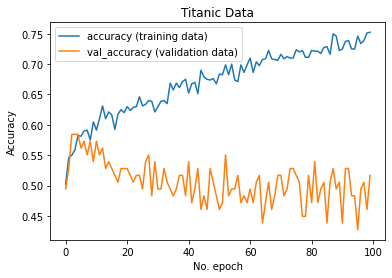

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot history: MAE
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='val_accuracy (validation data)')
plt.title('Titanic Data')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()